In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dress=pd.read_csv('final_test.csv')

In [ ]:
dress.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
dress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
dress['height'].unique()

array([172.72, 167.64, 165.1 , 175.26, 160.02, 170.18, 154.94, 177.8 ,
       157.48, 162.56, 147.32, 185.42, 180.34, 152.4 , 142.24, 182.88,
       187.96,    nan, 149.86, 190.5 , 144.78, 137.16, 193.04, 139.7 ])

In [ ]:
dress['weight'].unique()

array([ 62,  59,  61,  65,  50,  53,  51,  54,  63,  77,  64,  52,  55,
        74,  58,  47,  86,  68,  78,  49,  56,  81,  72,  60,  70,  79,
       113,  88, 104,  57,  95,  99,  80,  71,  83,  90,  66,  46,  73,
        48, 112,  69,  84,  45,  97,  75,  43,  67,  92,  76,  44, 102,
        40,  96, 108,  89,  82, 115, 122,  87,  91,  93,  85, 111,  98,
        94, 101, 125, 126, 131, 106, 107,  42,  22, 117,  31, 136, 120,
       123,  41, 118, 116, 100, 105, 124, 103,  35, 129, 119, 121, 109,
        26,  38,  36, 114,  39])

In [ ]:
dress['age'].unique()

array([ 28.,  36.,  34.,  27.,  45.,  65.,  33.,  26.,  32.,  30.,  35.,
        21.,  20.,  37.,  50.,  43.,  29.,  47.,  31.,  48.,  40.,  52.,
        24.,  25.,  49.,  22.,  42.,  53.,  69.,  23.,  17.,  44.,  41.,
        59.,  39.,  38.,  51.,  46.,  54.,  nan,  62.,  58.,  19.,  55.,
        60.,  61.,  57.,  56.,  70.,  16.,   0.,  64.,  63.,  77.,  68.,
        66.,  18.,  67.,  75.,   3.,  85.,  87., 116.,  72.,   2.,  91.,
       117.,  71.,  92.,   9.,  99.,  15.,   4.,  76.,  14., 100.,   1.,
         5.,  73., 113.,  81.,  88., 112.])

In [ ]:
dress['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

height, age have null values. 

In [ ]:
dress=dress[~dress['height'].isna()]
dress=dress[~dress['age'].isna()]

In [ ]:
dress=dress.reset_index(drop=True)

In [ ]:
dress

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119148,63,42.0,175.26,M
119149,45,29.0,154.94,S
119150,61,31.0,172.72,M
119151,74,31.0,167.64,XL


In [ ]:
dress.describe()

,weight,age,height
count,119153.000000,119153.000000,119153.000000
mean,61.756095,34.032714,165.807068
std,9.942877,8.148302,6.737797
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [ ]:
dress['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [ ]:
dress.shape

(119153, 4)

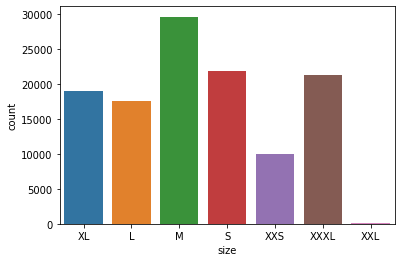

In [ ]:
sns.countplot(x=dress['size'])

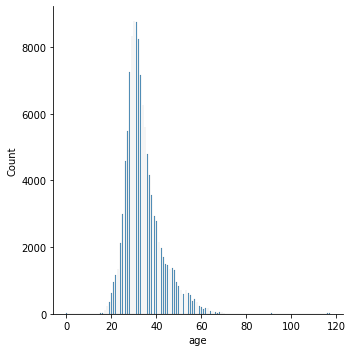

In [ ]:
sns.displot(dress['age'])

Removing outliers using standard score (z score)

In [ ]:
ds = []
sizes = []
for s in dress['size'].unique():
    sizes.append(s)
    x0 = dress[['age','height','weight']][dress['size'] == s]
    mean0=x0.mean()
    stn=x0.std()
    zscore = ((x0 - mean0)/stn)
    ds.append(zscore)
    
for i in range(len(ds)):
    ds[i]['age'] = ds[i]['age'][(ds[i]['age']>-3) & (ds[i]['age']<3)]
    ds[i]['height'] = ds[i]['height'][(ds[i]['height']>-3) & (ds[i]['height']<3)]
    ds[i]['weight'] = ds[i]['weight'][(ds[i]['weight']>-3) & (ds[i]['weight']<3)]

for i in range(len(sizes)):
    ds[i]['size'] = sizes[i]
dress = pd.concat(ds)
print(mean0)
print(stn)
dress.head()

age        36.304348
height    160.388116
weight     66.376812
dtype: float64
age       9.954757
height    7.068046
weight    5.102195
dtype: float64


,age,height,weight,size
0,-0.833765,0.767109,-0.660874,XL
24,-0.713753,1.539084,1.556823,XL
25,-0.353718,-1.162831,-0.291257,XL
28,-0.473729,-1.934807,-1.400106,XL
34,0.126330,-0.776843,0.447975,XL


In [ ]:
dress.isna().sum()

age       1470
height     215
weight    1063
size         0
dtype: int64

In [ ]:
dress["age"] = dress["age"].fillna(dress['age'].median())
dress["height"] = dress["height"].fillna(dress['height'].median())
dress["weight"] = dress["weight"].fillna(dress['weight'].median())

In [ ]:
dress['size'] = dress['size'].map({"XXS": 1,
                                     "S": 2,
                                     "M" : 3,
                                     "L" : 4,
                                     "XL" : 5,
                                     "XXL" : 6,
                                     "XXXL" : 7})

In [ ]:
dress.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

In [ ]:
dress

,age,height,weight,size
0,-0.833765,0.767109,-0.660874,5
24,-0.713753,1.539084,1.556823,5
25,-0.353718,-1.162831,-0.291257,5
28,-0.473729,-1.934807,-1.400106,5
34,0.126330,-0.776843,0.447975,5
...,...,...,...,...
112159,-1.236027,-1.489537,0.318135,6
114177,-0.633300,-0.052082,1.494100,6
114248,-0.432391,-0.052082,0.514129,6
114438,0.973972,-0.052082,-0.465841,6


In [ ]:
dress=dress.reset_index(drop=True)

In [ ]:
dress

,age,height,weight,size
0,-0.833765,0.767109,-0.660874,5
1,-0.713753,1.539084,1.556823,5
2,-0.353718,-1.162831,-0.291257,5
3,-0.473729,-1.934807,-1.400106,5
4,0.126330,-0.776843,0.447975,5
...,...,...,...,...
119148,-1.236027,-1.489537,0.318135,6
119149,-0.633300,-0.052082,1.494100,6
119150,-0.432391,-0.052082,0.514129,6
119151,0.973972,-0.052082,-0.465841,6


In [ ]:
dress['bmi'] = dress['height']/dress['weight']
dress['weight-squared'] = dress['weight'] * dress['weight']

In [ ]:
dress

,age,height,weight,size,bmi,weight-squared
0,-0.833765,0.767109,-0.660874,5,-1.160749,0.436754
1,-0.713753,1.539084,1.556823,5,0.988606,2.423699
2,-0.353718,-1.162831,-0.291257,5,3.992450,0.084831
3,-0.473729,-1.934807,-1.400106,5,1.381900,1.960297
4,0.126330,-0.776843,0.447975,5,-1.734122,0.200681
...,...,...,...,...,...,...
119148,-1.236027,-1.489537,0.318135,6,-4.682086,0.101210
119149,-0.633300,-0.052082,1.494100,6,-0.034858,2.232334
119150,-0.432391,-0.052082,0.514129,6,-0.101301,0.264329
119151,0.973972,-0.052082,-0.465841,6,0.111801,0.217008


In [ ]:
dress.groupby('size').mean()

,age,height,weight,bmi,weight-squared
size,,,,,
1,-5.953829e-02,-0.006133,-2.043325e-02,0.399904,0.872091
2,-5.534792e-02,-0.001573,-2.054789e-02,0.644420,0.879640
3,-4.958300e-02,0.000195,-1.732177e-02,0.086330,0.876880
4,-4.393115e-02,0.001336,-2.204635e-02,0.433030,0.872622
5,-4.023857e-02,-0.000103,-9.643722e-03,0.269611,0.914638
6,3.266308e-16,-0.098276,-1.435245e-15,0.177420,0.985507
7,-2.966250e-02,-0.002205,-6.413352e-02,0.271270,0.748968


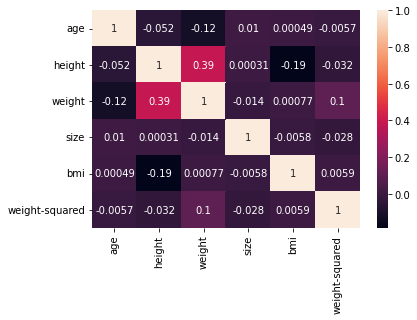

In [ ]:
corr = sns.heatmap(dress.corr(), annot=True)

In [ ]:
dress.isna().sum()

age               0
height            0
weight            0
size              0
bmi               0
weight-squared    0
dtype: int64

In [ ]:
X=dress.drop(columns='size', axis=1)
y=dress['size']

In [ ]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: size, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.20)

In [ ]:
len(X_train), len(X_test)

(95322, 23831)

In [ ]:
model= DecisionTreeClassifier()

In [ ]:
def fit_and_score(model, X_train, X_test, y_train, y_test):
  # Set random seed
    np.random.seed(30)
    
    model.fit(X_train, y_train)
    model_scores = model.score(X_test, y_test)
    return model_scores

In [ ]:
accuracy = fit_and_score(model,X_train,X_test,y_train,y_test)
accuracy

0.9993705677478913

prediction

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(X_test,y_pred)

             age    height    weight        bmi  weight-squared
118200 -0.047328  0.334722 -1.226354  -0.272941        1.503944
10249  -0.713753  0.767109 -0.106449  -7.206324        0.011331
93384  -0.228601  2.016288 -0.402006  -5.015568        0.161609
87676   0.453430  1.032463 -2.234841  -0.461985        4.994513
106737 -0.601009  0.334722 -0.372877  -0.897675        0.139037
...          ...       ...       ...        ...             ...
79448  -0.083305 -0.193741 -0.026228   7.386931        0.000688
65632  -0.188786 -1.273991 -0.523244   2.434793        0.273784
87933   2.307042  0.219498 -0.141649  -1.549585        0.020065
107822 -1.043954  0.698092  0.101277   6.892931        0.010257
81676  -1.559325  1.032463 -0.026228 -39.365553        0.000688

[23831 rows x 5 columns] [7 5 1 ... 1 7 2]


In [ ]:
mean0

age        36.304348
height    160.388116
weight     66.376812
dtype: float64

In [ ]:
stn

age       9.954757
height    7.068046
weight    5.102195
dtype: float64

In [ ]:
m1=[36.304348, 160.388116, 66.376812]
s1=[9.954757, 7.068046, 5.102195]

In [ ]:
a=float(input('age:'))
h=float(input('height:'))
w=int(input('weight:'))
ar=[a,h,w]
Tzs=[0,0,0]
for i in range(3):
  Tzs[i]=((ar[i] - m1[i])/s1[i])
a1=Tzs[0]
h1=Tzs[1]
w1=Tzs[2]
b=h1/w1
ws=w1*w1
tin=(a1,h1,w1,b,ws)
tarr = np.asarray(tin)
reshaped_in = tarr.reshape(1,-1)

age:30
height:160
weight:60


In [ ]:
y_pred = model.predict(reshaped_in)
sizen=['XXS','XS','S','L','XL','XXL','XXXL']
sizen[y_pred[0]-1]

'L'

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('DTmodel.pkl','wb'))

In [ ]:
dress.to_csv('cleandata.csv', index=False)

In [ ]:
d=pd.read_csv('cleandata.csv')

In [ ]:
d

,age,height,weight,size,bmi,weight-squared
0,-0.833765,0.767109,-0.660874,5,-1.160749,0.436754
1,-0.713753,1.539084,1.556823,5,0.988606,2.423699
2,-0.353718,-1.162831,-0.291257,5,3.992450,0.084831
3,-0.473729,-1.934807,-1.400106,5,1.381900,1.960297
4,0.126330,-0.776843,0.447975,5,-1.734122,0.200681
...,...,...,...,...,...,...
119148,-1.236027,-1.489537,0.318135,6,-4.682086,0.101210
119149,-0.633300,-0.052082,1.494100,6,-0.034858,2.232334
119150,-0.432391,-0.052082,0.514129,6,-0.101301,0.264329
119151,0.973972,-0.052082,-0.465841,6,0.111801,0.217008


In [ ]:
d.isna().sum()

age               0
height            0
weight            0
size              0
bmi               0
weight-squared    0
dtype: int64